# Sleep analysis

It has been 6 months since I have been tracking my sleeping data. I bought a Samsung Galaxy Watch Active 2 which allows me to track every stages of my sleep, every night.

The goal of this project is to analyse my sleep and see if I can find any correlations between my sleep quality and other external factors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
sleep_data = pd.read_csv('sleep_data_2021_02_09.csv', sep=';', skiprows=[0])

In [3]:
sleep_data.head()

,start_time,sleep_id,custom,update_time,create_time,stage,time_offset,deviceuuid,pkg_name,end_time,datauuid
0,2020-09-01 23:22:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40001,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-01 23:26:00.000,3713d761-0e35-bae5-ae2e-bdb42c2e1536
1,2020-09-01 23:49:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:06:00.000,72ec0096-b482-f885-2580-a6f95f91af15
2,2020-09-02 00:42:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:49:00.000,a25927cb-e04c-04d4-6231-032a60a218dc
3,2020-09-02 01:09:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 01:23:00.000,3a97ac3d-a55b-d34e-db1c-4b594e055823
4,2020-09-02 02:25:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 02:58:00.000,f12df4f9-97aa-6a4b-dd17-27f2d70b8c06


In [4]:
sleep_data.drop(['custom','sleep_id','deviceuuid','pkg_name','datauuid'],axis=1, inplace=True)

In [5]:
sleep_data.head()

,start_time,update_time,create_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,02.09.20 07:28,02.09.20 07:28,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:49:00.000,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,2020-09-02 00:06:00.000
2,2020-09-02 00:42:00.000,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,2020-09-02 00:49:00.000
3,2020-09-02 01:09:00.000,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,2020-09-02 01:23:00.000
4,2020-09-02 02:25:00.000,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,2020-09-02 02:58:00.000


In [6]:
#I decide to remove update_time and create_time because they do not look actionable compared to start_time
#and end_time
sleep_data.drop(['update_time','create_time'],axis=1, inplace=True)

In [7]:
sleep_data.head()

,start_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:49:00.000,40002,UTC+0200,2020-09-02 00:06:00.000
2,2020-09-02 00:42:00.000,40004,UTC+0200,2020-09-02 00:49:00.000
3,2020-09-02 01:09:00.000,40004,UTC+0200,2020-09-02 01:23:00.000
4,2020-09-02 02:25:00.000,40002,UTC+0200,2020-09-02 02:58:00.000


| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*

In [8]:
def time_offset(x):
    if x == 'UTC+0200':
        x = datetime.timedelta(hours=2)
    elif x == 'UTC+0100':
        x = datetime.timedelta(hours=1)
    return x

In [9]:
sleep_data['time_offset'] = sleep_data['time_offset'].apply(lambda x: time_offset(x))

In [10]:
for i in range(0,len(sleep_data)):
    sleep_data['start_time'].loc[i] = str(datetime.datetime.strptime(sleep_data['start_time'].loc[i], '%Y-%m-%d %H:%M:%S.%f') + sleep_data['time_offset'].loc[i])
    sleep_data['end_time'].loc[i] = str(datetime.datetime.strptime(sleep_data['end_time'].loc[i], '%Y-%m-%d %H:%M:%S.%f') + sleep_data['time_offset'].loc[i])

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
sleep_data.head()

,start_time,stage,time_offset,end_time
0,2020-09-02 01:22:00,40001,02:00:00,2020-09-02 01:26:00
1,2020-09-02 01:49:00,40002,02:00:00,2020-09-02 02:06:00
2,2020-09-02 02:42:00,40004,02:00:00,2020-09-02 02:49:00
3,2020-09-02 03:09:00,40004,02:00:00,2020-09-02 03:23:00
4,2020-09-02 04:25:00,40002,02:00:00,2020-09-02 04:58:00


In [12]:
sleep_data.drop('time_offset',axis=1,inplace=True)

In [13]:
#All the data was mixed up. In here I sort the values by start time.
sleep_data = sleep_data.sort_values('start_time').reset_index().drop('index',axis=1)

In [14]:
sleep_data.head()

,start_time,stage,end_time
0,2020-09-02 01:22:00,40001,2020-09-02 01:26:00
1,2020-09-02 01:26:00,40003,2020-09-02 01:29:00
2,2020-09-02 01:29:00,40002,2020-09-02 01:30:00
3,2020-09-02 01:30:00,40003,2020-09-02 01:33:00
4,2020-09-02 01:33:00,40002,2020-09-02 01:43:00


In [15]:
sleep_data['start_time_date'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[0])
sleep_data['start_time_hour'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[1].split('.')[0])
sleep_data['end_time_date'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[0])
sleep_data['end_time_hour'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[1].split('.')[0])

In [16]:
sleep_data.head()

,start_time,stage,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour
0,2020-09-02 01:22:00,40001,2020-09-02 01:26:00,2020-09-02,01:22:00,2020-09-02,01:26:00
1,2020-09-02 01:26:00,40003,2020-09-02 01:29:00,2020-09-02,01:26:00,2020-09-02,01:29:00
2,2020-09-02 01:29:00,40002,2020-09-02 01:30:00,2020-09-02,01:29:00,2020-09-02,01:30:00
3,2020-09-02 01:30:00,40003,2020-09-02 01:33:00,2020-09-02,01:30:00,2020-09-02,01:33:00
4,2020-09-02 01:33:00,40002,2020-09-02 01:43:00,2020-09-02,01:33:00,2020-09-02,01:43:00


In [17]:
def stage_pairing(x):
    if x == 40001:
        x = 'Awaken'
    elif x == 40002:
        x = 'Light'
    elif x == 40003:
        x = 'Deep'
    else:
        x = 'REM'
    return x

sleep_data['stage_of_sleep'] = sleep_data['stage'].apply(lambda x: stage_pairing(x))

In [18]:
sleep_data.head()

,start_time,stage,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-02 01:22:00,40001,2020-09-02 01:26:00,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken
1,2020-09-02 01:26:00,40003,2020-09-02 01:29:00,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep
2,2020-09-02 01:29:00,40002,2020-09-02 01:30:00,2020-09-02,01:29:00,2020-09-02,01:30:00,Light
3,2020-09-02 01:30:00,40003,2020-09-02 01:33:00,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep
4,2020-09-02 01:33:00,40002,2020-09-02 01:43:00,2020-09-02,01:33:00,2020-09-02,01:43:00,Light


In [19]:
sleep_data.drop(['start_time','stage','end_time'], axis=1, inplace=True)

In [20]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light


In [21]:
#Dates and hours are strings. I need to find a way to translate them into time values. I want to create a new
#column "Duration" to calculate the duration of each sleeping phase.

In [22]:
sleep_data['Duration'] = 0

for i in range(0,len(sleep_data)):
    sleep_data['Duration'].loc[i] = str((datetime.datetime.strptime(sleep_data['end_time_hour'].loc[i], '%H:%M:%S') - datetime.datetime.strptime(sleep_data['start_time_hour'].loc[i], '%H:%M:%S')))
    if sleep_data['Duration'].loc[i].find('day')!=-1:
        sleep_data['Duration'].loc[i] = sleep_data['Duration'].loc[i].split(', ')[1]
sleep_data['Duration'] = pd.to_timedelta(sleep_data['Duration'],errors='ignore')

In [23]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken,00:04:00
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep,00:03:00
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light,00:01:00
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep,00:03:00
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light,00:10:00


In [24]:
sleep_data['start_time_date_reworked']=0
for i in range(0, len(sleep_data)):
    if sleep_data['start_time_hour'].loc[i]>'22:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')
    elif sleep_data['start_time_hour'].loc[i] < '13:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d') - datetime.timedelta(days=1)
    elif sleep_data['start_time_hour'].loc[i] >= '13:00:00' and sleep_data['start_time_hour'].loc[i] <= '22:00:00':
        sleep_data.drop(i,inplace=True)
    else:
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')

In [25]:
#pd.set_option('display.max_rows', len(sleep_data))

sleep_data

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light,00:10:00,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
12456,2021-02-09,08:48:00,2021-02-09,08:49:00,Awaken,00:01:00,2021-02-08 00:00:00
12457,2021-02-09,08:49:00,2021-02-09,08:52:00,Light,00:03:00,2021-02-08 00:00:00
12458,2021-02-09,08:52:00,2021-02-09,08:54:00,Awaken,00:02:00,2021-02-08 00:00:00
12459,2021-02-09,08:54:00,2021-02-09,08:58:00,Light,00:04:00,2021-02-08 00:00:00


In [26]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light,00:10:00,2020-09-01 00:00:00


In [27]:
sleep_data_gb = sleep_data[['start_time_date_reworked','stage_of_sleep','Duration']]

In [28]:
sleep_data_gb.head()

,start_time_date_reworked,stage_of_sleep,Duration
0,2020-09-01 00:00:00,Awaken,00:04:00
1,2020-09-01 00:00:00,Deep,00:03:00
2,2020-09-01 00:00:00,Light,00:01:00
3,2020-09-01 00:00:00,Deep,00:03:00
4,2020-09-01 00:00:00,Light,00:10:00


In [29]:
sleep_data_final = sleep_data_gb.groupby(['start_time_date_reworked','stage_of_sleep']).sum().unstack().reset_index()
sleep_data_final.columns = sleep_data_final.columns.get_level_values(1)
sleep_data_final = pd.DataFrame(sleep_data_final)
sleep_data_final.columns = ['Date','Awaken','Deep','Light','REM']
#sleep_data_final.replace('NaT',0,inplace=True)
sleep_data_final.fillna(0,inplace=True)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  


In [30]:
sleep_data_final['Total'] = sleep_data_final['Awaken']+sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']

In [31]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00


In [32]:
sleep_data_final['Weekend'] = 0
for i in range(0, len(sleep_data_final)):
    if datetime.date.weekday(sleep_data_final['Date'].loc[i]) < 5:
        sleep_data_final['Weekend'].loc[i] = 0
    else:
        sleep_data_final['Weekend'].loc[i] = 1

**Weekend = 0 =>** *Monday, Tuesday, Wednesday, Thursday, Friday*

**Weekend = 1 =>** *Saturday, Sunday*

In [33]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [34]:
sleep_data_final.tail()

,Date,Awaken,Deep,Light,REM,Total,Weekend
155,2021-02-04,01:33:00,00:41:00,06:00:00,00:44:00,08:58:00,0
156,2021-02-05,01:03:00,00:39:00,05:24:00,01:14:00,08:20:00,0
157,2021-02-06,00:53:00,00:40:00,04:06:00,01:41:00,07:20:00,1
158,2021-02-07,01:05:00,00:37:00,02:00:00,01:00:00,04:42:00,1
159,2021-02-08,00:38:00,01:02:00,05:02:00,02:04:00,08:46:00,0


In [35]:
sleep_data_final['Total'].min()

Timedelta('0 days 04:30:00')

In [36]:
sleep_data_final['Total'].max()

Timedelta('0 days 11:02:00')

In [37]:
sleep_data_final[sleep_data_final['Weekend']==0]['Total'].mean()

Timedelta('0 days 07:44:26.086956')

In [38]:
sleep_data_final[sleep_data_final['Weekend']==1]['Total'].mean()

Timedelta('0 days 07:30:56')

In [39]:
sleep_data_final['Awaken'].mean()

Timedelta('0 days 00:49:01.875000')

In [40]:
sleep_data_final['Deep'].mean()

Timedelta('0 days 00:41:49.125000')

In [41]:
sleep_data_final['Light'].mean()

Timedelta('0 days 04:58:18.375000')

In [42]:
sleep_data_final['REM'].mean()

Timedelta('0 days 01:11:28.875000')

In [43]:
(sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']).mean()

Timedelta('0 days 06:51:36.375000')

In [44]:
print('Standard deviation (bed time):',(sleep_data_final['Total'].astype('timedelta64[m]')).std())

Standard deviation (bed time): 74.19627950970157


/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Bed time in minutes')

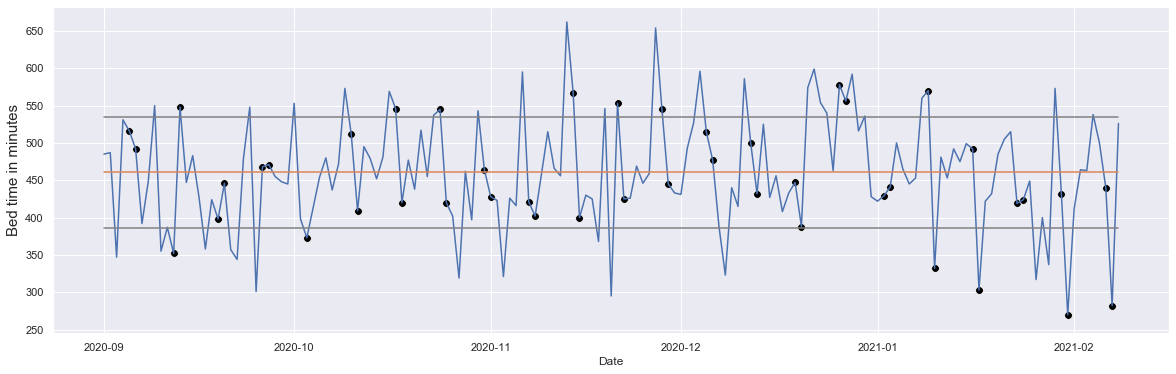

In [45]:
sns.set(rc={'figure.figsize':(20, 6)})
y = sleep_data_final['Total'].astype('timedelta64[m]')
sns.lineplot(x=sleep_data_final['Date'],y=y)
sns.scatterplot(x=sleep_data_final[sleep_data_final['Weekend']==1]['Date'],y=y,marker='o',s=60,color='black') #Weekend
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()) #Average line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()+y.std(),color='grey') #Standard deviation line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()-y.std(),color='grey') #Standard deviation line
plt.ylabel('Bed time in minutes', fontsize=15)

In [46]:
print('Standard deviation (asleep):',(sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')).std())

Standard deviation (asleep): 69.99021466870256


Text(0, 0.5, 'Minutes asleep')

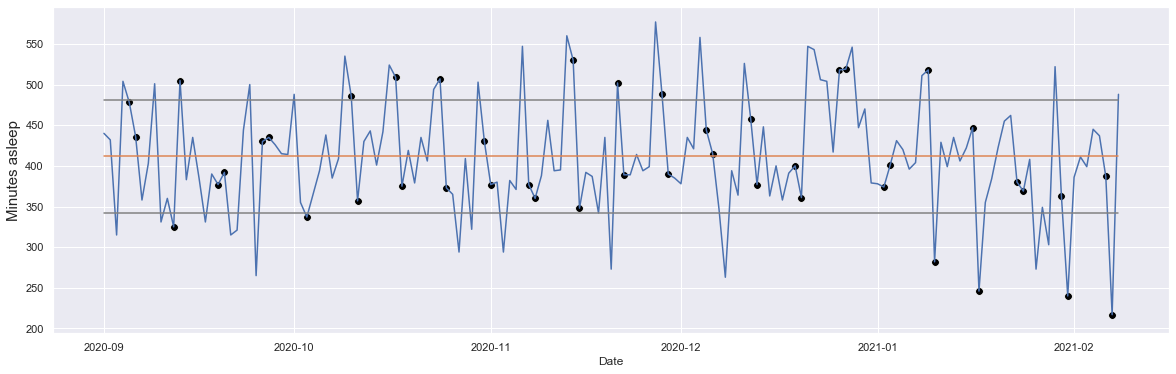

In [47]:
sns.set(rc={'figure.figsize':(20, 6)})
y = sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')
sns.lineplot(x=sleep_data_final['Date'],y=y)
sns.scatterplot(x=sleep_data_final[sleep_data_final['Weekend']==1]['Date'],y=y,marker='o',s=60,color='black') #Weekend
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()) #Average line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()+y.std(),color='grey') #Standard deviation line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()-y.std(),color='grey') #Standard deviation line
plt.ylabel('Minutes asleep', fontsize=15)

In here I only took into account minutes asleep: Deep+Light+REM without taking into account awake time. The orange line is the average number of minutes asleep, the grey ones are the standard deviation and the black dots are the weekend days.

Text(0, 0.5, 'Minutes asleep')

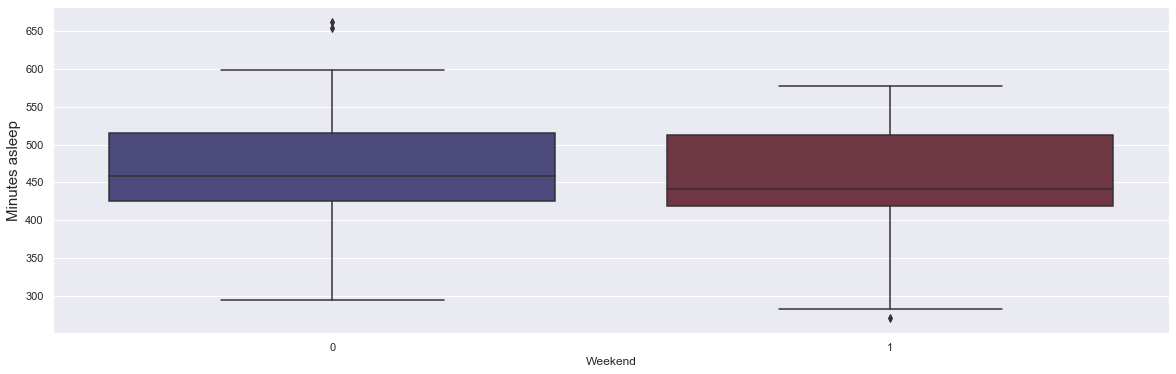

In [48]:
sns.boxplot(x=sleep_data_final['Weekend'],y=sleep_data_final['Total'].astype('timedelta64[m]'),palette='icefire')
plt.ylabel('Minutes asleep', fontsize=15)

# Analysis per hour

In [49]:
sleep_data_per_hour = sleep_data.copy()

In [50]:
def hour_matching(x):
    if x >= '00:00:00' and x < '01:00:00':
        x = '00:00:00'
    elif x >= '01:00:00' and x < '02:00:00':
        x = '01:00:00'
    elif x >= '02:00:00' and x < '03:00:00':
        x = '02:00:00'
    elif x >= '03:00:00' and x < '04:00:00':
        x = '03:00:00'
    elif x >= '04:00:00' and x < '05:00:00':
        x = '04:00:00'
    elif x >= '05:00:00' and x < '06:00:00':
        x = '05:00:00'
    elif x >= '06:00:00' and x < '07:00:00':
        x = '06:00:00'
    elif x >= '07:00:00' and x < '08:00:00':
        x = '07:00:00'
    elif x >= '08:00:00' and x < '09:00:00':
        x = '08:00:00'
    elif x >= '09:00:00' and x < '10:00:00':
        x = '09:00:00'
    elif x >= '10:00:00' and x < '11:00:00':
        x = '10:00:00'
    elif x >= '11:00:00' and x < '12:00:00':
        x = '11:00:00'
    elif x >= '12:00:00' and x < '13:00:00':
        x = '12:00:00'
    elif x >= '13:00:00' and x < '14:00:00':
        x = '13:00:00'
    elif x >= '14:00:00' and x < '15:00:00':
        x = '14:00:00'
    elif x >= '15:00:00' and x < '16:00:00':
        x = '15:00:00'
    elif x >= '16:00:00' and x < '17:00:00':
        x = '16:00:00'
    elif x >= '17:00:00' and x < '18:00:00':
        x = '17:00:00'
    elif x >= '18:00:00' and x < '19:00:00':
        x = '18:00:00'
    elif x >= '19:00:00' and x < '20:00:00':
        x = '19:00:00'
    elif x >= '20:00:00' and x < '21:00:00':
        x = '20:00:00'
    elif x >= '21:00:00' and x < '22:00:00':
        x = '21:00:00'
    elif x >= '22:00:00' and x < '23:00:00':
        x = '22:00:00'
    elif x >= '23:00:00' and x <= '23:59:00':
        x = '23:00:00'
    return x

In [51]:
sleep_data_per_hour['start_time_hour']=sleep_data_per_hour['start_time_hour'].apply(lambda x: hour_matching(x))

In [52]:
sleep_data_per_hour.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-02,01:00:00,2020-09-02,01:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-02,01:00:00,2020-09-02,01:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-02,01:00:00,2020-09-02,01:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-02,01:00:00,2020-09-02,01:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-02,01:00:00,2020-09-02,01:43:00,Light,00:10:00,2020-09-01 00:00:00


In [53]:
sleep_data_per_hour = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration']].groupby(['start_time_hour','stage_of_sleep']).sum().reset_index()

In [54]:
sleep_data_per_hour

,start_time_hour,stage_of_sleep,Duration
0,00:00:00,Awaken,0 days 00:36:00
1,00:00:00,Deep,0 days 00:27:00
2,00:00:00,Light,0 days 02:42:00
3,00:00:00,REM,0 days 00:08:00
4,01:00:00,Awaken,0 days 02:45:00
5,01:00:00,Deep,0 days 03:11:00
6,01:00:00,Light,0 days 16:51:00
7,01:00:00,REM,0 days 01:12:00
8,02:00:00,Awaken,0 days 07:53:00
9,02:00:00,Deep,0 days 13:37:00


In [55]:
sleep_data_per_hour['Duration (%)'] = 0
sleep_data_per_hour = sleep_data_per_hour.append({'start_time_hour':'22:00:00','stage_of_sleep':'REM','Duration':datetime.timedelta(0)},ignore_index=True).sort_values('start_time_hour').reset_index().drop('index',axis=1)
sleep_data_per_hour = sleep_data_per_hour.append({'start_time_hour':'23:00:00','stage_of_sleep':'Deep','Duration':datetime.timedelta(0)},ignore_index=True).sort_values('start_time_hour').reset_index().drop('index',axis=1)

#sleep_data_per_hour.index = sleep_data_per_hour.index+1
for i in range(0,len(sleep_data_per_hour),4):
    sleep_data_per_hour['Duration (%)'].loc[i] = sleep_data_per_hour['Duration'].loc[i] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+1] = sleep_data_per_hour['Duration'].loc[i+1] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+2] = sleep_data_per_hour['Duration'].loc[i+2] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+3] = sleep_data_per_hour['Duration'].loc[i+3] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])    

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
sleep_data_per_hour.head()

,start_time_hour,stage_of_sleep,Duration,Duration (%)
0,00:00:00,Awaken,00:36:00,0.154506
1,00:00:00,Deep,00:27:00,0.115880
2,00:00:00,Light,02:42:00,0.695279
3,00:00:00,REM,00:08:00,0.034335
4,01:00:00,Awaken,02:45:00,0.114663


In [57]:
sleep_data_per_hour_pivot = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration (%)']].pivot(index='start_time_hour',columns='stage_of_sleep',values='Duration (%)')

In [58]:
sleep_data_per_hour_pivot

stage_of_sleep,Awaken,Deep,Light,REM
start_time_hour,,,,
00:00:00,0.154506,0.115880,0.695279,0.034335
01:00:00,0.114663,0.132731,0.702571,0.050035
02:00:00,0.086172,0.148843,0.672982,0.092002
03:00:00,0.094265,0.149120,0.608291,0.148325
04:00:00,0.086297,0.104341,0.652266,0.157096
05:00:00,0.064490,0.095620,0.676840,0.163050
06:00:00,0.054086,0.096467,0.687622,0.161825
07:00:00,0.062034,0.077401,0.676610,0.183955
08:00:00,0.145594,0.043463,0.651221,0.159722


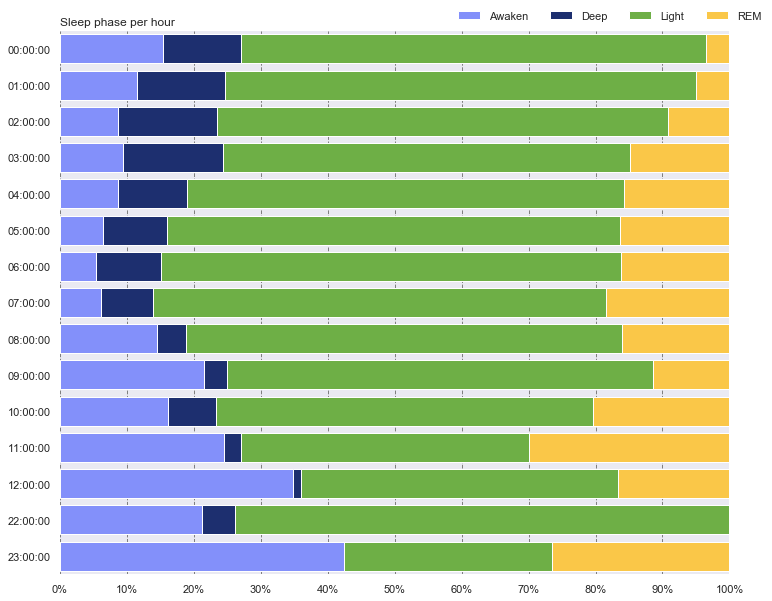

In [59]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#8390FA','#1D2F6F', '#6EAF46', '#FAC748']
title = 'Sleep phase per hour'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_per_hour_pivot.sort_values('start_time_hour',ascending=False), labels, colors, title, subtitle)

| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*

# Comparison vs. step count

In [60]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [61]:
step_count_data = pd.read_excel('Step_count.xlsx')

In [62]:
sleep_data_final_step = pd.merge(sleep_data_final,step_count_data)

In [63]:
sleep_data_final_step.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Step count
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,129
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,1762
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,2681
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0,11185
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,8562


In [64]:
sleep_data_final_step['Awaken']=sleep_data_final_step['Awaken'].astype('timedelta64[m]')
sleep_data_final_step['Deep']=sleep_data_final_step['Deep'].astype('timedelta64[m]')
sleep_data_final_step['Light']=sleep_data_final_step['Light'].astype('timedelta64[m]')
sleep_data_final_step['REM']=sleep_data_final_step['REM'].astype('timedelta64[m]')
sleep_data_final_step['Total']=sleep_data_final_step['Total'].astype('timedelta64[m]')

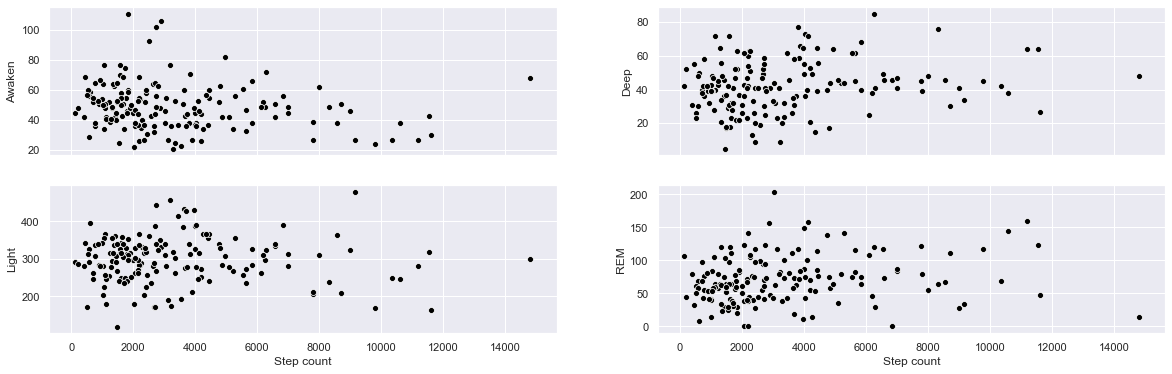

In [65]:
ig, axs = plt.subplots(nrows=2,ncols=2,sharex=True)
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Awaken'],ax=axs[0,0],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Deep'],ax=axs[0,1],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Light'],ax=axs[1,0],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['REM'],ax=axs[1,1],color='black')

In [66]:
sleep_data_final_step.corr()

,Awaken,Deep,Light,REM,Total,Weekend,Step count
Awaken,1.000000,0.008581,0.347336,-0.277174,0.367176,-0.129142,-0.179390
Deep,0.008581,1.000000,0.135301,0.050533,0.342721,0.073874,0.188625
Light,0.347336,0.135301,1.000000,-0.165812,0.852773,-0.081701,-0.038719
REM,-0.277174,0.050533,-0.165812,1.000000,0.296764,-0.004149,0.180525
Total,0.367176,0.342721,0.852773,0.296764,1.000000,-0.082072,0.055682
Weekend,-0.129142,0.073874,-0.081701,-0.004149,-0.082072,1.000000,0.271935
Step count,-0.179390,0.188625,-0.038719,0.180525,0.055682,0.271935,1.000000


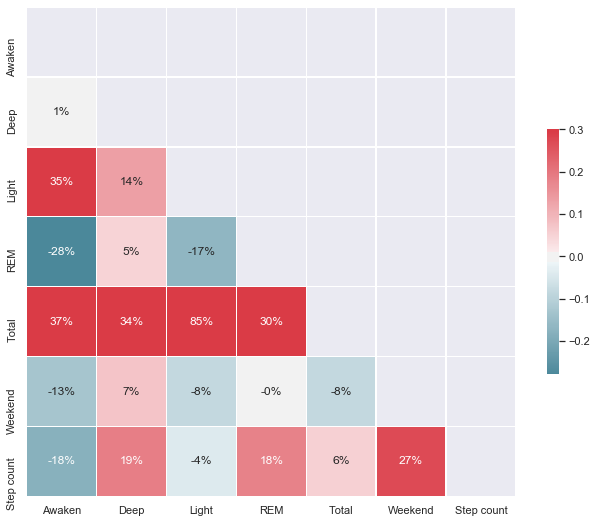

In [67]:
mask = np.zeros_like(sleep_data_final_step.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_step.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

- 'Step count' is **19%** correlated with 'Deep'
- 'Step count' is **18%** correlated with 'REM'
- 'Step count' is **-18%** correlated with 'Awaken'

These might not be considered as very high correlation scores. Still, when it comes to finding correlations in human behaviours, it is worth noting.

We also have to keep in mind that correlation does not imply causation: these scores only tell us that changes in one variable are associated with changes in another variable.

# Comparison vs. GitHub activity

In [68]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [69]:
github_data = pd.read_excel('Github_activity.xlsx')

In [70]:
sleep_data_final_github = pd.merge(sleep_data_final,github_data)

In [71]:
sleep_data_final_github.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Github activity
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,0


In [72]:
sleep_data_final_github['Awaken']=sleep_data_final_github['Awaken'].astype('timedelta64[m]')
sleep_data_final_github['Deep']=sleep_data_final_github['Deep'].astype('timedelta64[m]')
sleep_data_final_github['Light']=sleep_data_final_github['Light'].astype('timedelta64[m]')
sleep_data_final_github['REM']=sleep_data_final_github['REM'].astype('timedelta64[m]')
sleep_data_final_github['Total']=sleep_data_final_github['Total'].astype('timedelta64[m]')

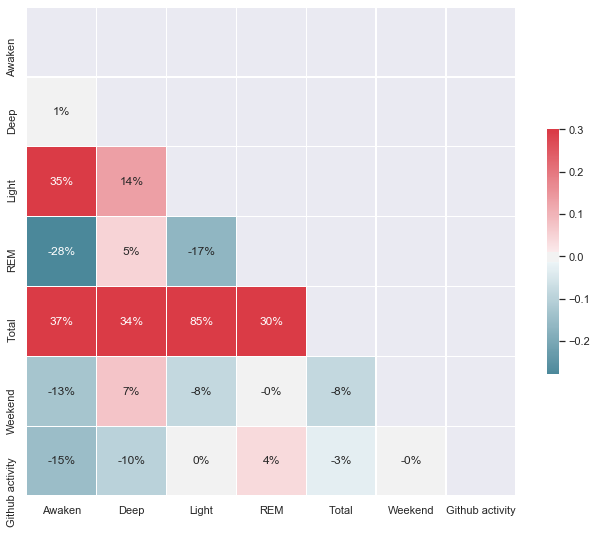

In [73]:
mask = np.zeros_like(sleep_data_final_github.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_github.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

- 'Github activity' is **-15%** correlated with 'Awaken'
- 'Github activity' is **-10%** correlated with 'Deep'

These correlations could be explained by the fact that I have only categorized as "1" when I was coding late at night. I wanted to assess whether late coding would affect my sleep. As a matter of fact, I usually coded until I would feel sleepy, so I did not have troubles to sleep. This could explain the negative correlation with "Awaken". Besides, I was expecting a negative correlation with deep sleep knowing the fact that when you go to sleep later than you should, you might miss some sleeping phases. I have read that deep sleep usually occurs in the very first stages of sleep. Therefore, having a negative correlation with GitHub activity was expected.

These might not be considered as very high correlation scores. Still, when it comes to finding correlations in human behaviours, it is worth noting.

# Comparison vs. early/late sleep

In [74]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light,00:10:00,2020-09-01 00:00:00


In [75]:
i=0
sleep_data=sleep_data.reset_index().drop('index',axis=1)
sleep_data_start_end = sleep_data.copy().iloc[0:0]
while i < len(sleep_data):
    if i != 0:
        sleep_data_start_end = sleep_data_start_end.append(sleep_data.loc[i-1])
    sleep_data_start_end = sleep_data_start_end.append(sleep_data.loc[i])
    i = i + len(sleep_data[sleep_data['start_time_date_reworked']==sleep_data['start_time_date_reworked'].loc[i]])

#sleep_data_start_end_final = pd.DataFrame(columns=['Date','Bed time', 'Wake time'])
sleep_data_start_end = sleep_data_start_end.reset_index().drop('index',axis=1)
for i in range(0,len(sleep_data_start_end)-1,2):
    sleep_data_start_end['end_time_hour'].loc[i] = sleep_data_start_end['end_time_hour'].loc[i+1]
    sleep_data_start_end = sleep_data_start_end.drop(i+1)

sleep_data_start_end = sleep_data_start_end.reset_index().drop(['index','start_time_date','end_time_date','stage_of_sleep','Duration'],axis=1)
sleep_data_start_end.columns = ['Bed time', 'Wake time', 'Date']

#for i in range(0,len(sleep_data_start_end)):
 #   sleep_data_start_end['Bed time'] = datetime.datetime.strptime(str(sleep_data_start_end['Bed time'].loc[i]), '%H:%M:%S')

In [76]:
sleep_data_start_end.head()

,Bed time,Wake time,Date
0,01:22:00,09:27:00,2020-09-01
1,01:22:00,09:29:00,2020-09-02
2,02:02:00,07:49:00,2020-09-03
3,01:27:00,10:18:00,2020-09-04
4,03:16:00,11:52:00,2020-09-05


In [139]:
# < 1h : slept early
# > 2h30 : slept late
# < 9h : woke up early
# > 12h30 : woke up late

def early_sleep(x):
    if (x >= "22:00:00" and x <= "23:59:59") or (x >= "00:00:00" and x <= "01:00:00"):
        x = 1
    else:
        x = 0
    return x

def late_sleep(x):
    if (x >= "02:30:00" and x <= "08:00:00"):
        x = 1
    else:
        x = 0
    return x

def early_wake(x):
    if (x <= "09:00:00"):
        x = 1
    else:
        x = 0
    return x

def late_wake(x):
    if (x >= "10:30:00"):
        x = 1
    else:
        x = 0
    return x

In [140]:
"09:00:00" < sleep_data_start_end['Wake time'].loc[0]

True

In [141]:
sleep_data_start_end['Early sleep'] = sleep_data_start_end['Bed time'].apply(lambda x: early_sleep(x))
sleep_data_start_end['Late sleep'] = sleep_data_start_end['Bed time'].apply(lambda x: late_sleep(x))
sleep_data_start_end['Early wake'] = sleep_data_start_end['Wake time'].apply(lambda x: early_wake(x))
sleep_data_start_end['Late wake'] = sleep_data_start_end['Wake time'].apply(lambda x: late_wake(x))

In [142]:
sleep_data_start_end.head()

,Bed time,Wake time,Date,Early sleep,Late sleep,Early wake,Late wake
0,01:22:00,09:27:00,2020-09-01,0,0,0,0
1,01:22:00,09:29:00,2020-09-02,0,0,0,0
2,02:02:00,07:49:00,2020-09-03,0,0,1,0
3,01:27:00,10:18:00,2020-09-04,0,0,0,0
4,03:16:00,11:52:00,2020-09-05,0,1,0,1


In [143]:
sleep_data_start_end[sleep_data_start_end['Late wake']==1]

,Bed time,Wake time,Date,Early sleep,Late sleep,Early wake,Late wake
4,03:16:00,11:52:00,2020-09-05,0,1,0,1
10,04:03:00,10:30:00,2020-09-11,0,1,0,1
11,03:46:00,10:41:00,2020-09-12,0,1,0,1
12,02:27:00,11:35:00,2020-09-13,0,0,0,1
17,03:27:00,11:26:00,2020-09-18,0,1,0,1
18,04:22:00,11:00:00,2020-09-19,0,1,0,1
32,05:33:00,11:46:00,2020-10-03,0,1,0,1
37,02:24:00,11:57:00,2020-10-09,0,0,0,1
38,02:54:00,11:26:00,2020-10-10,0,1,0,1
40,02:11:00,13:11:00,2020-10-12,0,0,0,1


In [144]:
sleep_data_final_bed_time = pd.merge(sleep_data_final,sleep_data_start_end)

In [145]:
sleep_data_final_bed_time.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Bed time,Wake time,Early sleep,Late sleep,Early wake,Late wake
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,01:22:00,09:27:00,0,0,0,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,01:22:00,09:29:00,0,0,0,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,02:02:00,07:49:00,0,0,1,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0,01:27:00,10:18:00,0,0,0,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,03:16:00,11:52:00,0,1,0,1


In [146]:
#for i in range(0,len(sleep_data_final_bed_time)):
#    sleep_data_final_bed_time['Bed time'].loc[i] = datetime.timedelta(hours=datetime.datetime.strptime(sleep_data_start_end['Bed time'].loc[i], '%H:%M:%S').hour,minutes=datetime.datetime.strptime(sleep_data_start_end['Bed time'].loc[i], '%H:%M:%S').minute,seconds=datetime.datetime.strptime(sleep_data_start_end['Bed time'].loc[i], '%H:%M:%S').second)
#    sleep_data_final_bed_time['Wake time'].loc[i] = datetime.timedelta(hours=datetime.datetime.strptime(sleep_data_start_end['Wake time'].loc[i], '%H:%M:%S').hour,minutes=datetime.datetime.strptime(sleep_data_start_end['Wake time'].loc[i], '%H:%M:%S').minute,seconds=datetime.datetime.strptime(sleep_data_start_end['Wake time'].loc[i], '%H:%M:%S').second)

In [147]:
sleep_data_final_bed_time

,Date,Awaken,Deep,Light,REM,Total,Weekend,Bed time,Wake time,Early sleep,Late sleep,Early wake,Late wake
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,01:22:00,09:27:00,0,0,0,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,01:22:00,09:29:00,0,0,0,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,02:02:00,07:49:00,0,0,1,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0,01:27:00,10:18:00,0,0,0,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,03:16:00,11:52:00,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2021-02-04,01:33:00,00:41:00,06:00:00,00:44:00,08:58:00,0,01:26:00,10:24:00,0,0,0,0
156,2021-02-05,01:03:00,00:39:00,05:24:00,01:14:00,08:20:00,0,02:08:00,10:28:00,0,0,0,0
157,2021-02-06,00:53:00,00:40:00,04:06:00,01:41:00,07:20:00,1,01:56:00,09:16:00,0,0,0,0
158,2021-02-07,01:05:00,00:37:00,02:00:00,01:00:00,04:42:00,1,07:36:00,13:01:00,0,1,0,1


In [148]:
type(sleep_data_final_bed_time['Bed time'].loc[0])

str

In [149]:
type(sleep_data_final_bed_time['Bed time'].loc[0])

str

In [150]:
sleep_data_final_bed_time['Awaken']=sleep_data_final_bed_time['Awaken'].astype('timedelta64[m]')
sleep_data_final_bed_time['Deep']=sleep_data_final_bed_time['Deep'].astype('timedelta64[m]')
sleep_data_final_bed_time['Light']=sleep_data_final_bed_time['Light'].astype('timedelta64[m]')
sleep_data_final_bed_time['REM']=sleep_data_final_bed_time['REM'].astype('timedelta64[m]')
sleep_data_final_bed_time['Total']=sleep_data_final_bed_time['Total'].astype('timedelta64[m]')
#sleep_data_final_bed_time['Bed time']=sleep_data_final_bed_time['Bed time'].astype('timedelta64[h]')
#sleep_data_final_bed_time['Wake time']=sleep_data_final_bed_time['Wake time'].astype('timedelta64[h]')

In [151]:
sleep_data_final_bed_time.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Bed time,Wake time,Early sleep,Late sleep,Early wake,Late wake
0,2020-09-01,45.0,42.0,292.0,106.0,485.0,0,01:22:00,09:27:00,0,0,0,0
1,2020-09-02,55.0,47.0,328.0,57.0,487.0,0,01:22:00,09:29:00,0,0,0,0
2,2020-09-03,32.0,49.0,172.0,94.0,347.0,0,02:02:00,07:49:00,0,0,1,0
3,2020-09-04,27.0,64.0,280.0,160.0,531.0,0,01:27:00,10:18:00,0,0,0,0
4,2020-09-05,38.0,46.0,365.0,67.0,516.0,1,03:16:00,11:52:00,0,1,0,1


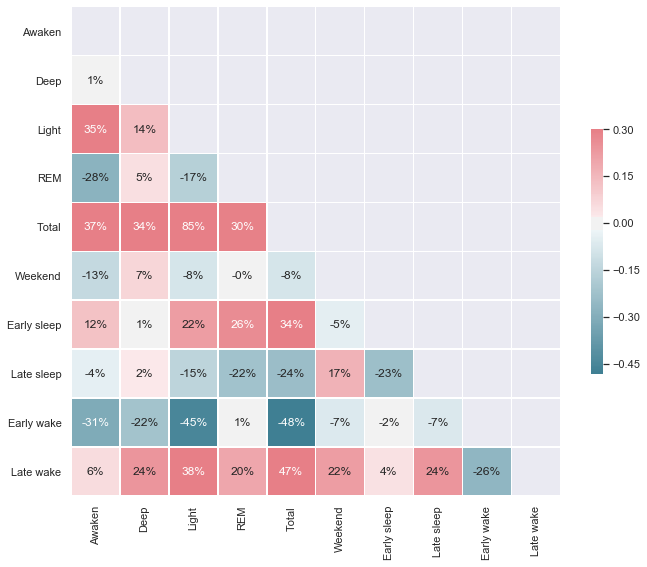

In [152]:
mask = np.zeros_like(sleep_data_final_bed_time.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_bed_time.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

# Rework the insights!!

"Early sleep" has a **positive impact** on "Light sleep" and "REM sleep" while also increasing "Total sleep".

"Late sleep" has a **negative impact** on "REM sleep" and "Total sleep".

"Early wake" has a **strong negative impact** on "Light sleep" and "Total sleep".

"Late wake" has a **positive correlation** with "Awaken" which can be explained by the fact that I often lounge in bed.

When comparing "Early sleep" and "Late wake", it looks like sleeping early is more benificial as it has a positive impact on both light and REM sleep.

# How long should I sleep?

Compare "Total sleep" with phases of sleep

I could take only the lines with "Total > 8h" and check which sleep phases were most proeminent while comparing with "Total < 6h".

In [250]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [251]:
sleep_data_final_long = sleep_data_final.copy().iloc[0:0].drop(['Date','Total','Weekend'],axis=1)
t = []
m = 0
n = ['4-5h','5-6h','6-7h','7-8h','8-9h','9-10h','10-11h','11-12h']
for i,j in zip(('04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00'),('05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00')):
    for k in ('Awaken','Deep','Light','REM'):
        t.append(sleep_data_final[(sleep_data_final['Total']>i) & (sleep_data_final['Total']<j)][k].mean())
    sleep_data_final_long.loc[m] = t
    sleep_data_final_long = sleep_data_final_long.rename(index={m:n[m]})
    t = []
    m=m+1

In [252]:
sleep_data_final_long

,Awaken,Deep,Light,REM
4-5h,00:39:00,00:31:40,02:35:20,00:56:20
5-6h,00:36:17.142857,00:32:42.857142,03:15:30,01:08:47.142857
6-7h,00:40:44.210526,00:35:53.684210,04:10:15.789473,01:11:34.736842
7-8h,00:49:45.714285,00:42:21.904761,04:52:18.095238,01:02:01.904761
8-9h,00:57:44,00:42:16,05:32:26,01:14:06
9-10h,00:49:12,00:50:00,06:02:38.400000,01:42:55.200000
10-11h,01:17:00,00:41:00,07:37:00,01:19:00
11-12h,01:42:00,00:55:00,07:23:00,01:02:00


In [253]:
sleep_data_final_long['Total'] = sleep_data_final_long['Awaken']+sleep_data_final_long['Deep']+sleep_data_final_long['Light']+sleep_data_final_long['REM']

In [254]:
sleep_data_final_long['Awaken'] = sleep_data_final_long['Awaken'] / sleep_data_final_long['Total']
sleep_data_final_long['Deep'] = sleep_data_final_long['Deep'] / sleep_data_final_long['Total']
sleep_data_final_long['Light'] = sleep_data_final_long['Light'] / sleep_data_final_long['Total']
sleep_data_final_long['REM'] = sleep_data_final_long['REM'] / sleep_data_final_long['Total']

sleep_data_final_long.drop('Total',axis=1,inplace=True)

In [255]:
sleep_data_final_long

,Awaken,Deep,Light,REM
4-5h,0.138135,0.112161,0.550177,0.199528
5-6h,0.108873,0.098157,0.586584,0.206387
6-7h,0.102232,0.090081,0.628054,0.179633
7-8h,0.111459,0.094891,0.654709,0.138941
8-9h,0.113977,0.083443,0.656291,0.146288
9-10h,0.087117,0.088533,0.642113,0.182237
10-11h,0.117737,0.062691,0.698777,0.120795
11-12h,0.154079,0.083082,0.669184,0.093656


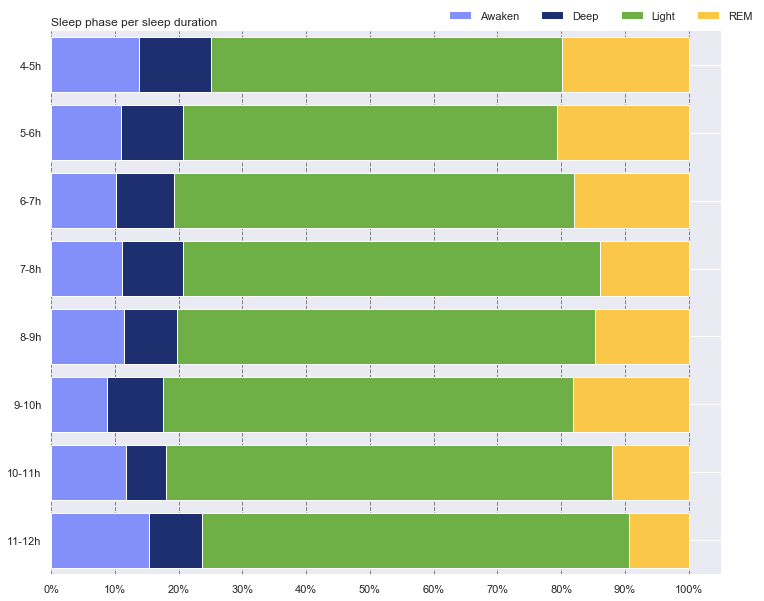

In [286]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#8390FA','#1D2F6F', '#6EAF46', '#FAC748']
title = 'Sleep phase per sleep duration'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_final_long.iloc[::-1], labels, colors, title, subtitle)

# Sleep phases per day

In [258]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [275]:
sleep_data_final['Weekday']=0

for i in range(0,len(sleep_data_final)):
    sleep_data_final['Weekday'].loc[i] = sleep_data_final['Date'].loc[i].weekday()

In [276]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Weekday
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,1
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,2
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,3
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0,4
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,5


In [278]:
sleep_data_final_weekday = sleep_data_final.copy().iloc[0:0].drop(['Date','Total','Weekend','Weekday'],axis=1)
t = []
m = 0
n = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in (0,1,2,3,4,5,6):
    for k in ('Awaken','Deep','Light','REM'):
        t.append(sleep_data_final[sleep_data_final['Weekday']==i][k].mean())
    sleep_data_final_weekday.loc[m] = t
    sleep_data_final_weekday = sleep_data_final_weekday.rename(index={m:n[m]})
    t = []
    m=m+1

In [279]:
sleep_data_final_weekday

,Awaken,Deep,Light,REM
Monday,00:48:10.434782,00:45:23.478260,04:59:07.826086,01:04:33.913043
Tuesday,00:47:02.608695,00:38:33.913043,04:52:41.739130,01:00:02.608695
Wednesday,00:52:15.652173,00:40:49.565217,05:02:02.608695,01:11:13.043478
Thursday,00:55:54.782608,00:41:05.217391,04:49:33.913043,01:08:36.521739
Friday,00:48:02.608695,00:39:44.347826,05:23:49.565217,01:33:26.086956
Saturday,00:44:07.826086,00:45:54.782608,05:05:18.260869,01:26:26.086956
Sunday,00:47:35.454545,00:41:10.909090,04:34:32.727272,00:55:21.818181


In [280]:
sleep_data_final_weekday['Total'] = sleep_data_final_weekday['Awaken']+sleep_data_final_weekday['Deep']+sleep_data_final_weekday['Light']+sleep_data_final_weekday['REM']

In [281]:
sleep_data_final_weekday['Awaken'] = sleep_data_final_weekday['Awaken'] / sleep_data_final_weekday['Total']
sleep_data_final_weekday['Deep'] = sleep_data_final_weekday['Deep'] / sleep_data_final_weekday['Total']
sleep_data_final_weekday['Light'] = sleep_data_final_weekday['Light'] / sleep_data_final_weekday['Total']
sleep_data_final_weekday['REM'] = sleep_data_final_weekday['REM'] / sleep_data_final_weekday['Total']

sleep_data_final_weekday.drop('Total',axis=1,inplace=True)

In [282]:
sleep_data_final_weekday

,Awaken,Deep,Light,REM
Monday,0.105353,0.099268,0.654179,0.141200
Tuesday,0.107320,0.087979,0.667725,0.136977
Wednesday,0.112064,0.087544,0.647679,0.152713
Thursday,0.122839,0.090267,0.636164,0.150731
Friday,0.095127,0.078685,0.641185,0.185003
Saturday,0.091598,0.095298,0.633697,0.179406
Sunday,0.113668,0.098361,0.655738,0.132233


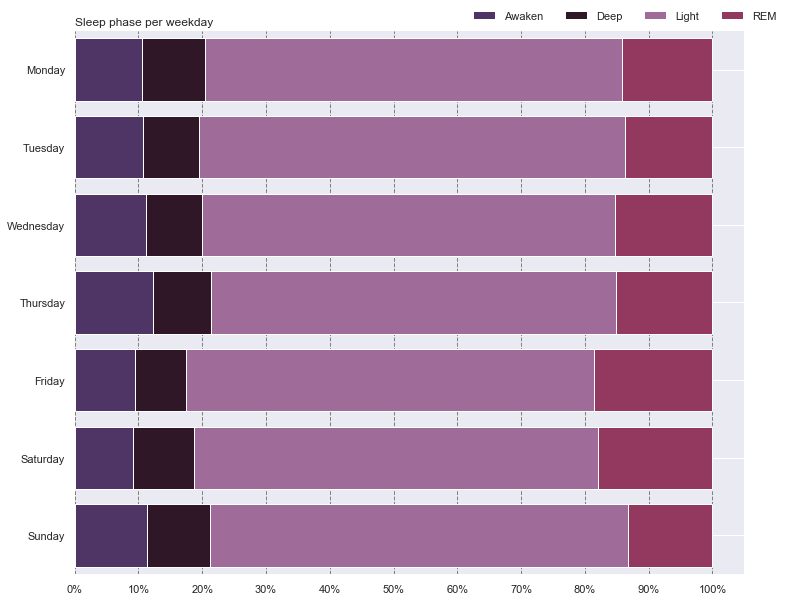

In [290]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#4F3466FF','#301728FF', '#9F6B99FF', '#93385FFF']
title = 'Sleep phase per weekday'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_final_weekday.iloc[::-1], labels, colors, title, subtitle)